# GR5291 Final Project

## Group Member: Ares Wang(yw3626)

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
train_data = pd.read_csv('train.csv',index_col=0)
test_data = pd.read_csv('test.csv', index_col=0)

In [56]:
train_data.isna().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [57]:
test_data.isna().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [58]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [59]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25976 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 25976 non-null  int64  
 1   Gender                             25976 non-null  object 
 2   Customer Type                      25976 non-null  object 
 3   Age                                25976 non-null  int64  
 4   Type of Travel                     25976 non-null  object 
 5   Class                              25976 non-null  object 
 6   Flight Distance                    25976 non-null  int64  
 7   Inflight wifi service              25976 non-null  int64  
 8   Departure/Arrival time convenient  25976 non-null  int64  
 9   Ease of Online booking             25976 non-null  int64  
 10  Gate location                      25976 non-null  int64  
 11  Food and drink                     25976 non-null  int

In [60]:
# NAs in Arrival Delay in Minutes
train_data.dropna(subset=['Arrival Delay in Minutes'],inplace=True)
test_data.dropna(subset=['Arrival Delay in Minutes'],inplace=True)

In [61]:
# Gender(Female, Male)
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
train_data.Gender = le1.fit_transform(train_data.Gender)
test_data.Gender = le1.transform(test_data.Gender)

# Customer Type(Loyal Customer, disloyal Customer)
le2 = LabelEncoder()
train_data['Customer Type'] = le2.fit_transform(train_data['Customer Type'])
test_data['Customer Type'] = le2.transform(test_data['Customer Type'])

# Type of Travel(Business travel, Personal Travel)
le3 = LabelEncoder()
train_data['Type of Travel'] = le3.fit_transform(train_data['Type of Travel'])
test_data['Type of Travel'] = le3.transform(test_data['Type of Travel'])

# Class(Business, Eco, Eco Plus)
le4 = LabelEncoder()
train_data['Class'] = le4.fit_transform(train_data['Class'])
test_data['Class'] = le4.transform(test_data['Class'])


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
X = train_data.drop(['satisfaction'], axis=1)
X = StandardScaler().fit_transform(X)

y = train_data['satisfaction'].values
ohe = OneHotEncoder()
y_ohe = ohe.fit_transform(y.reshape(-1,1)).toarray()

train_X, val_X, train_y, val_y = train_test_split(X, y_ohe, test_size=0.2, stratify=y)
test_X = test_data.drop(['satisfaction'], axis=1)
test_X = StandardScaler().fit_transform(test_X)
test_y = test_data['satisfaction'].values
test_y_ohe = ohe.transform(test_y.reshape(-1,1)).toarray()

In [70]:
print(train_X.shape)
print(train_y.shape)
print(val_X.shape)
print(val_y.shape)

(82875, 23)
(82875, 2)
(20719, 23)
(20719, 2)


In [71]:
val_y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [82]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

mymodel = Sequential()
mymodel.add(Dense(256, activation='relu', input_shape = (23,)))
mymodel.add(Dense(256, activation='relu'))
mymodel.add(Dropout(0.3))
mymodel.add(Dense(128, activation='relu'))
mymodel.add(Dropout(0.2))
mymodel.add(Dense(2, activation='softmax'))
mymodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
mymodel.fit(train_X, train_y, validation_data=(val_X, val_y), epochs=5, shuffle=True,batch_size=128)

Epoch 1/5
648/648 [==============================] - 4s 5ms/step - loss: 0.1866 - accuracy: 0.9251 - val_loss: 0.1231 - val_accuracy: 0.9486
Epoch 2/5
648/648 [==============================] - 3s 4ms/step - loss: 0.1197 - accuracy: 0.9504 - val_loss: 0.1114 - val_accuracy: 0.9533
Epoch 3/5
648/648 [==============================] - 3s 4ms/step - loss: 0.1030 - accuracy: 0.9570 - val_loss: 0.0976 - val_accuracy: 0.9582
Epoch 4/5
648/648 [==============================] - 3s 4ms/step - loss: 0.0969 - accuracy: 0.9593 - val_loss: 0.0949 - val_accuracy: 0.9584
Epoch 5/5
648/648 [==============================] - 3s 5ms/step - loss: 0.0918 - accuracy: 0.9610 - val_loss: 0.0920 - val_accuracy: 0.9617


In [79]:
mymodel.predict(test_X)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

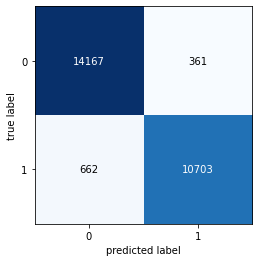

In [83]:
b = ohe.inverse_transform(mymodel.predict(test_X))
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
#c = ohe.inverse_transform(val_y)
cm = confusion_matrix(test_y, b)
plot_confusion_matrix(cm)